<a href="https://colab.research.google.com/github/SUDHANSHU4497/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import Different Library Whose Function And Methods Will Be Used In This Project***

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Mount google drive***


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***import dataset from from google grive***

In [61]:
hotel_booking_analysis='/content/drive/MyDrive/dataset/Hotel Bookings.csv'
hba_df=pd.read_csv(hotel_booking_analysis)

In [62]:
# Previewing total number of row and columns in data set
hba_df.shape

(119390, 32)

In [63]:
# previewing the first five rows of dataset
hba_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [64]:
hba_df.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], dtype=object)

In [65]:
hba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [66]:
hba_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [67]:
percent_null_data=(hba_df.isnull().sum()/len(hba_df.index)*100).sort_values(ascending=False)
percent_null_data

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          


*   Missing value in  "company", "agent", "country", "children" column.
*   More than 90% missing data in "company" column.
*   More than 13% missing data in "agent" column
*   It indicate that most of the customer book their hotel by self.
*   Few column have inapproperiate datatype




*   **Removing "company" and "agent" column from dataset**
*   **days_in_waiting_list is not an useful column**


In [68]:
hba_df = hba_df.drop(columns = ['agent', 'company','days_in_waiting_list'])

In [11]:
hba_df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [69]:
hba_df = hba_df.dropna(axis = 0)

In [70]:
hba_df['is_canceled']=hba_df['is_canceled'].astype('category')
hba_df['meal']=hba_df['meal'].astype('category')
hba_df['market_segment']=hba_df['market_segment'].astype('category')
hba_df['distribution_channel']=hba_df['distribution_channel'].astype('category')
hba_df['is_repeated_guest']=hba_df['is_repeated_guest'].astype('category')
hba_df['reserved_room_type']=hba_df['reserved_room_type'].astype('category')
hba_df['assigned_room_type']=hba_df['assigned_room_type'].astype('category')
hba_df['deposit_type']=hba_df['deposit_type'].astype('category')
hba_df['customer_type']=hba_df['customer_type'].astype('category')
hba_df['reservation_status']=hba_df['reservation_status'].astype('category')
hba_df['reservation_status_date']=hba_df['reservation_status_date'].astype('datetime64[ns]')

In [71]:
hba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  category      
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

In [72]:
hba_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [73]:
numeric_cols = hba_df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = hba_df.select_dtypes(['object','category']).columns.tolist()

In [74]:
numeric_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']

In [75]:
categorical_cols

['hotel',
 'is_canceled',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [76]:
hba_df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

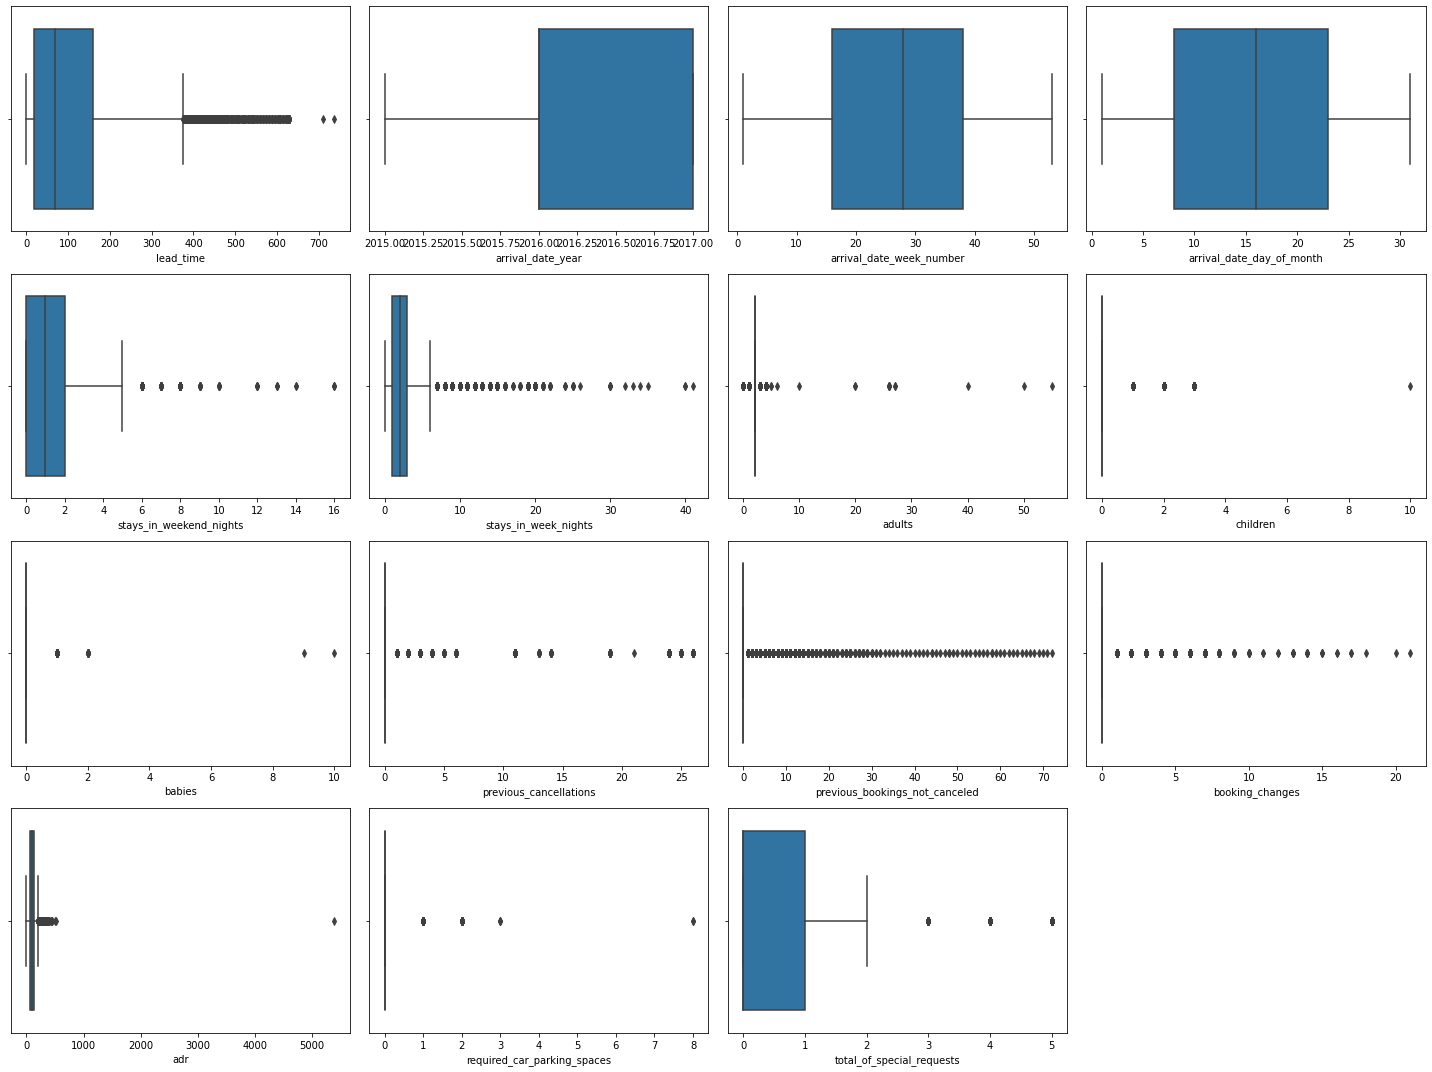

In [77]:

n = 1
plt.figure(figsize=(20,15))

for column in numeric_cols:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(hba_df[column])
  plt.tight_layout()

In [54]:
print("lead time between 400 to 500 is",hba_df[(hba_df['lead_time']>400) & (hba_df['lead_time']<=500)].shape[0])
print("lead time between 500 to 600 is  ",hba_df[(hba_df['lead_time']>500) & (hba_df['lead_time']<=600)].shape[0])
print("lead time more than 600 is ",hba_df[(hba_df['lead_time']>600)].shape[0])

lead time between 400 to 500 is 1633
lead time between 500 to 600 is   334
lead time more than 600 is  147


In [55]:
print("stays_in_weekend_nights between 5 t0 16 is ",hba_df[(hba_df['stays_in_weekend_nights']>5) & (hba_df['stays_in_weekend_nights']<=16)].shape[0])

stays_in_weekend_nights between 5 t0 16 is  263


In [78]:
print("number of adults between 2 to 4 is ",hba_df[(hba_df['adults']>=2) & (hba_df['adults']<=4)].shape[0])
print("adults more than 4 is ",hba_df[(hba_df['adults']>4)].shape[0])

number of adults between 2 to 4 is  95754
adults more than 4 is  16


In [80]:
print("number of children more than 8 is ",hba_df[(hba_df['children']>=8)].shape[0])

number of children more than 8 is  1


In [81]:
print("babies more than 8 is ",hba_df[(hba_df['babies']>8)].shape[0])

babies more than 8 is  2


In [83]:
print("previous_cancellations between 0 to 15 is ",hba_df[(hba_df['previous_cancellations']>0) & (hba_df['previous_cancellations']<=15)].shape[0])
print("previous_cancellations more than 15 is ",hba_df[(hba_df['previous_cancellations']>15) ].shape[0])

previous_cancellations between 0 to 15 is  6328
previous_cancellations more than 15 is  119


In [84]:
print("previous_bookings_not_canceled between 0 t0 30 is ",hba_df[(hba_df['previous_bookings_not_canceled']>0) & (hba_df['previous_bookings_not_canceled']<=30)].shape[0])
print("previous_bookings_not_canceled between 30 t0 60 is ",hba_df[(hba_df['previous_bookings_not_canceled']>30) & (hba_df['previous_bookings_not_canceled']<=60)].shape[0])
print("previous_bookings_not_canceled more than 60 is ",hba_df[(hba_df['previous_bookings_not_canceled']>60) ].shape[0])

previous_bookings_not_canceled between 0 t0 30 is  3350
previous_bookings_not_canceled between 30 t0 60 is  35
previous_bookings_not_canceled more than 60 is  12


In [86]:
print("booking_changes between 0 t0 5 is ",hba_df[(hba_df['booking_changes']>0) & (hba_df['booking_changes']<=5)].shape[0])
print("booking_changes between 5 t0 10 is ",hba_df[(hba_df['booking_changes']>5) & (hba_df['booking_changes']<=10)].shape[0])
print("booking_changes more than 10 is ",hba_df[(hba_df['booking_changes']>10)].shape[0])

booking_changes between 0 t0 5 is  17847
booking_changes between 5 t0 10 is  125
booking_changes more than 10 is  24


In [87]:
print("adr between 0 t0 3000 is ",hba_df[(hba_df['adr']>0) & (hba_df['adr']<=3000)].shape[0])
print("adr more than 3000  is ",hba_df[(hba_df['adr']>3000) ].shape[0])

adr between 0 t0 3000 is  116958
adr more than 3000  is  1


In [89]:
print("required_car_parking_spaces between 0 t0 4 is ",hba_df[(hba_df['required_car_parking_spaces']>0) & (hba_df['required_car_parking_spaces']<=4)].shape[0])
print("required_car_parking_spaces more than 4  is ",hba_df[(hba_df['required_car_parking_spaces']>4) ].shape[0])

required_car_parking_spaces between 0 t0 4 is  7308
required_car_parking_spaces more than 4  is  2


In [ ]:
hba_df.loc[hba_df.lead_time > 500, 'lead_time'] = 500
hba_df.loc[hba_df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
hba_df.loc[hba_df.adults > 4, 'adults'] = 4
hba_df.loc[hba_df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
hba_df.loc[hba_df.previous_cancellations > 0, 'previous_cancellations'] = 1
hba_df.loc[hba_df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
hba_df.loc[hba_df.booking_changes > 5, 'booking_changes'] = 5
hba_df.loc[hba_df.babies > 8, 'babies'] = 0
hba_df.loc[hba_df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
hba_df.loc[hba_df.children > 8, 'children'] = 0
hba_df.loc[hba_df.adr > 1000, 'adr'] = 1000